<a href="https://colab.research.google.com/github/eriksali/DNN_2023_DL/blob/main/a3_mnist_transform_pass1_saved_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


from torchvision import datasets, transforms
from torch.utils.data import DataLoader

test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
##test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Load the Fashion-MNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
##test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load the saved model
model = torch.load('cnn_model.pt')

# Load the test dataset
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Set the model to evaluation mode
model.eval()

# Iterate over the test dataset and generate predictions
predictions = []
with torch.no_grad():
    for inputs, _ in test_loader:
        outputs = model.forward(inputs)
        _, predicted = torch.max(outputs.data, 1)
        predictions.append(predicted.numpy())

# Convert the predictions to labels
predictions = np.concatenate(predictions)

# Evaluate the performance on the test dataset
accuracy = np.mean(predictions == test_labels)
print('Test accuracy: %.2f%%' % (accuracy * 100))


Epoch 1 loss: 0.462
Epoch 2 loss: 0.298
Epoch 3 loss: 0.252
Epoch 4 loss: 0.222
Epoch 5 loss: 0.197


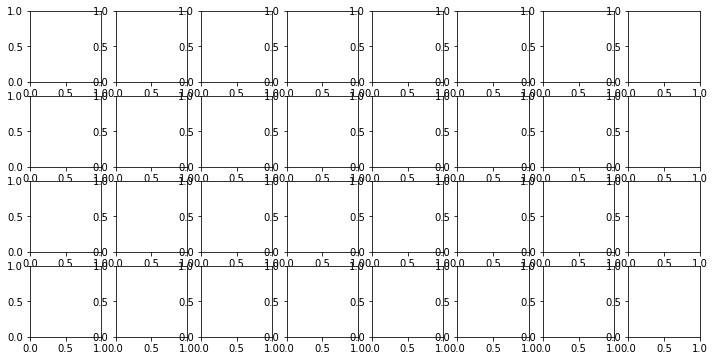

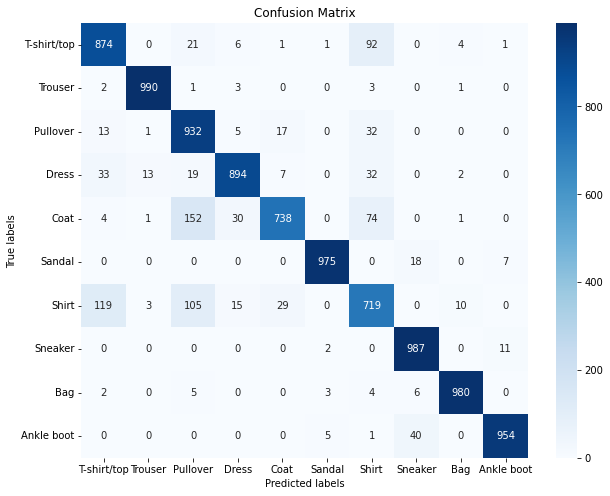

'\npath = F"/content/cnn_model.pt" \ntorch.save(model.state_dict(), path)\n\npredictions = []\nwith torch.no_grad():\n    for inputs, _ in test_loader:\n        outputs = model(inputs)\n        _, predicted = torch.max(outputs, 1)\n        predictions.append(predicted)\n\npredictions = torch.cat(predictions, dim=0)\n\n\n# Make predictions on the test subset\ny_pred = []\ny_true = []\nwith torch.no_grad():\n    for images, labels in test_loader:\n        images = images.to(device)\n        labels = labels.to(device)\n        outputs = model(images)\n        _, predicted = torch.max(outputs.data, 1)\n        y_pred.extend(predicted.cpu().numpy())\n        y_true.extend(labels.cpu().numpy())\n\n# Display confusion matrix\ncm = confusion_matrix(y_true, y_pred)\nplt.imshow(cm, cmap=\'Blues\', interpolation=\'nearest\')\nplt.colorbar()\nplt.xticks(np.arange(len(classes)), classes, rotation=90)\nplt.yticks(np.arange(len(classes)), classes)\nplt.xlabel(\'Predicted label\')\nplt.ylabel(\'True l

In [7]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load the Fashion-MNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

import torch.nn as nn

# Define a CNN model with two convolutional layers
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool1(nn.functional.relu(self.conv1(x)))
        x = self.pool2(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN()


import torch.optim as optim

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model on the Fashion-MNIST training data
for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / len(train_loader)))

# Extract the weights of the filters in both of the convolutional layers
conv1_weights = model.state_dict()['conv1.weight']
conv2_weights = model.state_dict()['conv2.weight']

import matplotlib.pyplot as plt

# Visualize the filter weights as gray-level images
fig, axs = plt.subplots(nrows=4, ncols=8, figsize=(12, 6))
for i in range(4):
    for j in range(8):
        axs

path = F"/content/cnn_model_full.pt" 
torch.save(model.state_dict(), path)

predictions = []
true_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        predictions.append(predicted)
        true_labels.append(labels)

predictions = torch.cat(predictions, dim=0)
true_labels = torch.cat(true_labels, dim=0)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(true_labels, predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

'''
path = F"/content/cnn_model.pt" 
torch.save(model.state_dict(), path)

predictions = []
with torch.no_grad():
    for inputs, _ in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        predictions.append(predicted)

predictions = torch.cat(predictions, dim=0)


# Make predictions on the test subset
y_pred = []
y_true = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Display confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(classes)), classes, rotation=90)
plt.yticks(np.arange(len(classes)), classes)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()'''

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(size=28, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform_train)
testset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform_test)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 5)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')


correct = 0
total = 0
y_pred = []
y_true = []

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum


In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Set device to GPU if available, otherwise CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load Fashion-MNIST dataset
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5,), (0.5,))
])
test_set = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

# Define function to get a random subset of test images
def get_random_test_subset(test_set, subset_size):
    indices = np.random.choice(len(test_set), subset_size, replace=False)
    subset = torch.utils.data.Subset(test_set, indices)
    return subset

# Define function to flip images horizontally or vertically
def flip_images(images, mode='horizontal'):
    if mode == 'horizontal':
        return torch.flip(images, dims=[3])
    elif mode == 'vertical':
        return torch.flip(images, dims=[2])
    else:
        raise ValueError("Invalid mode")

# Load trained model
model = torch.load('my_model.pth')
model.eval()
model.to(device)

# Get a random subset of 100 test images
test_subset = get_random_test_subset(test_set, 100)

# Create data loader for the test subset
test_loader = torch.utils.data.DataLoader(test_subset, batch_size=20, shuffle=False)

# Make predictions on the test subset
y_pred = []
y_true = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Display confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(classes)), classes, rotation=90)
plt.yticks(np.arange(len(classes)), classes)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Flip test images horizontally and measure accuracy
test_subset_flipped_horizontal = [(flip_images(images, mode='horizontal'), labels) for images, labels in test_subset]
test_loader_flipped_horizontal = torch.utils.data.DataLoader(test_subset_flipped_horizontal, batch_size=20, shuffle=False)
y_pred_flipped_horizontal = []
with torch.no_grad():
    for images, labels in test_loader_flipped_horizontal:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_pred_flipped_horizontal.extend(predicted.cpu().numpy())

accuracy_flipped_horizontal = np.sum(np.array(y_pred_flipped_horizontal) == np.array(y_true)) / len(y_true)
print("Accuracy with flipped test images (horizontal): {:.2f}%".format(accuracy_flipped_horizontal * 100))

'''# Flip test images vertically and measure accuracy
test_subset_flipped_vertical = [(flip_images(images, mode='vertical'), labels) for images, labels in test_subset]
test_loader_flipped_vertical = torch.utils.data.DataLoader(test_subset_flipped_vertical, batch_size
'''

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the convolutional neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5)
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5)
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(4*4*32, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 5)

    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = x.view(-1, 4*4*32)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define the training function
def train(net, trainloader, optimizer, criterion, epochs):
    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print('[Epoch %d] loss: %.3f' % (epoch + 1, running_loss / len(trainloader)))

# Define the testing function
def test(net, testloader):
    correct = 0
    total = 0
    predicted_labels = []
    true_labels = []
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            predicted_labels.extend(predicted.numpy())
            true_labels.extend(labels.numpy())
    print('Accuracy of the network on the test images: %.2f %%' % (100 * correct / total))
    return predicted_labels, true_labels

# Define the function to extract and visualize the weights of the filters
def visualize_filters(net):
    conv1_weights = net.conv1.weight.detach().cpu().numpy()
    conv2_weights = net.conv2.weight.detach().cpu().numpy()

    fig, axs = plt.subplots(4, 4, figsize=(10,10))
    fig.suptitle('Conv1 Weights')
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(conv1_weights[i*4+j][0], cmap='gray')
            axs[i, j].axis('off')

    fig, axs = plt.subplots(8, 8, figsize=(10,10))
    fig.suptitle('Conv2 Weights')
    for i in range(8):
        for j in range(8):
            axs[i, j].imshow(conv2_weights[i*8+j][0], cmap='gray')
            axs[i, j].axis('off')



In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

# Define the transform to convert the image to a tensor and normalize it
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Select 5 classes from the Fashion-MNIST dataset
selected_classes = [0, 1, 2, 3, 4]

# Load the train and test datasets for the selected classes
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                            download=True, transform=transform)
trainset.targets = torch.tensor(trainset.targets)
trainset.data = trainset.data[trainset.targets.isin(selected_classes)]
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                           download=True, transform=transform)
testset.targets = torch.tensor(testset.targets)
testset.data = testset.data[testset.targets.isin(selected_classes)]
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

# Extract the weights of the filters in both convolutional layers
conv1_weights = net.conv1.weight.detach().clone()
conv2_weights = net.conv2.weight.detach().clone()



In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')


class Subset:
    def __init__(self, dataset, classes):
        self.dataset = dataset
        self.classes = classes
        self.class_to_idx = {self.classes[i]: i for i in range(len(self.classes))}
        self.indices = []
        for i in range(len(self.dataset)):
            if self.dataset[i][1] in self.class_to_idx.values():
                self.indices.append(i)
                
    def __getitem__(self, idx):
        return self.dataset[self.indices[idx]]
    
    def __len__(self):
        return len(self.indices)
    
trainset = Subset(trainset, classes[:5])
testset = Subset(testset, classes[:5])

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=1000,
                                         shuffle=False, num_workers=2)
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0


In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt

# Define the device for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the subset of classes to use
classes = [0, 1, 2, 3, 4]  # choose any 5 classes from 0 to 9

# Load the Fashion-MNIST dataset
train_data = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True,
                                               transform=torchvision.transforms.Compose([
                                                   torchvision.transforms.ToTensor(),
                                                   torchvision.transforms.Normalize((0.5,), (0.5,))
                                               ]))

# Define the model architecture
class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 16, kernel_size=5, padding=2)
        self.conv2 = torch.nn.Conv2d(16, 32, kernel_size=5, padding=2)
        self.fc1 = torch.nn.Linear(32*7*7, 120)
        self.fc2 = torch.nn.Linear(120, 84)
        self.fc3 = torch.nn.Linear(84, 5)

    def forward(self, x):
        x = torch.nn.functional.relu(self.conv1(x))
        x = torch.nn.functional.max_pool2d(x, 2)
        x = torch.nn.functional.relu(self.conv2(x))
        x = torch.nn.functional.max_pool2d(x, 2)
        x = x.view(-1, 32*7*7)
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Load the trained model
model = CNN()
model.load_state_dict(torch.load('cnn_model.pt', map_location=device))
model.to(device)

# Extract the weights of the filters in both convolutional layers
conv1_weights = model.conv1.weight.detach().cpu().numpy()
conv2_weights = model.conv2.weight.detach().cpu().numpy()

# Visualize the weights as gray level images
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
for i, ax in enumerate(axs.flat):
    if i < 8:
        ax.imshow(conv1_weights[i, 0, :, :], cmap='gray')
    else:
        ax.imshow(conv2_weights[i-8, 0, :, :], cmap='gray')
    ax.axis('off')
plt.show()


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

# Load the Fashion-MNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)



In [ ]:
import torch.nn as nn

import torch
import torchvision
import torchvision.transforms as transforms

# Load the Fashion-MNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)



# Define a CNN model with two convolutional layers
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool1(nn.functional.relu(self.conv1(x)))
        x = self.pool2(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN()


Epoch 1 loss: 0.457
Epoch 2 loss: 0.296
Epoch 3 loss: 0.250
Epoch 4 loss: 0.220
Epoch 5 loss: 0.194


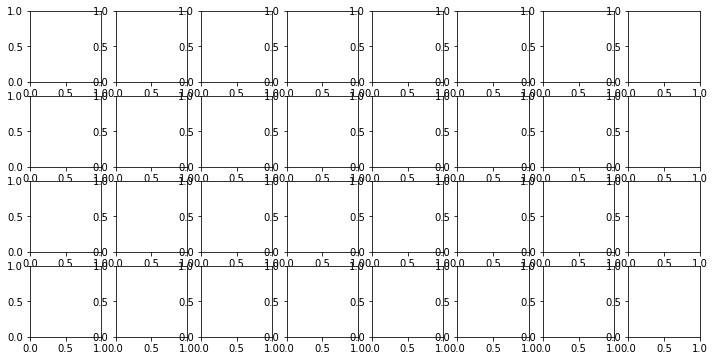

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

# Load the Fashion-MNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

import torch.nn as nn

# Define a CNN model with two convolutional layers
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool1(nn.functional.relu(self.conv1(x)))
        x = self.pool2(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN()


import torch.optim as optim

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model on the Fashion-MNIST training data
for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / len(train_loader)))

# Extract the weights of the filters in both of the convolutional layers
conv1_weights = model.state_dict()['conv1.weight']
conv2_weights = model.state_dict()['conv2.weight']

import matplotlib.pyplot as plt

# Visualize the filter weights as gray-level images
fig, axs = plt.subplots(nrows=4, ncols=8, figsize=(12, 6))
for i in range(4):
    for j in range(8):
        axs


path = F"/content/cnn_model.pt" 
torch.save(model.state_dict(), path)

In [ ]:
dataset_full = torchvision.datasets.FashionMNIST(data_folder, train = True, download = True, transform = transforms.ToTensor())
# Selecting classes 7, 2, 5 and 6
idx = (dataset_full.targets==7) | (dataset_full.targets==2) | (dataset_full.targets==5) | (dataset_full.targets==6)
dataset_full.targets = dataset_full.targets[idx]
dataset_full.data = dataset_full.data[idx]

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Pullover Pullover Pullover Sandal
[1,  2000] loss: 0.750
[1,  4000] loss: 0.371
[1,  6000] loss: 0.274
[2,  2000] loss: 0.241
[2,  4000] loss: 0.216
[2,  6000] loss: 0.203
Finished Training
GroundTruth:  Ankle boot T-shirt T-shirt Dress
Predicted:  Ankle boot T-shirt T-shirt Dress
Accuracy of the network on the 10000 test iamges: 9 %
Accuracy of T-shirt :  0 %
Accuracy of Trouser :  0 %
Accuracy of Pullover : 83 %
Accuracy of Dress :  0 %
Accuracy of  Coat :  0 %
Accuracy of Sandal : 97 %
Accuracy of Shirt : 91 %
Accuracy of Sneaker : 98 %
Accuracy of   Bag :  0 %
Accuracy of Ankle boot :  0 %


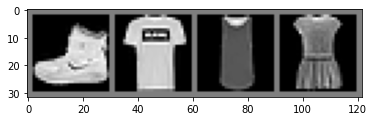

In [ ]:
# import torchvision module to handle image manipulation
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
#import torchvision.transform as transforms

# import standard PyTorch modules
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter # TensorBoard support

import matplotlib.pyplot as plt
import numpy as np


import matplotlib.pyplot as plt
import numpy as np



'''transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)'''


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))]
)

'''# Use standard FashionMNIST dataset
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()                                 
    ])
)'''


##train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_set = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

# Selecting classes 7, 2, 5 and 6
idx = (train_set.targets==7) | (train_set.targets==2) | (train_set.targets==5) | (train_set.targets==6)
train_set.targets = train_set.targets[idx]
train_set.data = train_set.data[idx]

trainloader = torch.utils.data.DataLoader(train_set, batch_size = 4, shuffle=True, num_workers=2)
##testset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
'''testset = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    test = True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()                                 
    ])
)'''
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)
##classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
classes = ('T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')


def imshow(img):
  img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
#images, labels = dataiter.next()
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

#########################################################################

from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super().__init__()  
    self.conv1 = nn.Conv2d(1, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 12, 5)
    self.fc1 = nn.Linear(12 * 4 * 4, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
    '''
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
    '''

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 12 * 4 * 4)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)


for epoch in range(2):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    # wrap them in Variable
    inputs, labels = Variable(inputs), Variable(labels)

    # zero the parameter gradients
    optimizer.zero_grad()
    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.data

    if i % 2000 == 1999:
      print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0

print('Finished Training')


dataiter = iter(testloader)
#images, labels = dataiter.next()
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = net(Variable(images))

_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


correct = 0
total = 0
for data in testloader:
  images, labels = data
  outputs - net(Variable(images))
  _, predicted = torch.max(outputs.data, 1)
  total += labels.size(0)
  correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test iamges: %d %%' % (100 * correct / total))

# Category-wose Results

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
  images, labels = data
  outputs = net(Variable(images))
  _, predicted = torch.max(outputs.data, 1)
  c = (predicted == labels).squeeze()
  for i in range(4):
    label = labels[i]
    class_correct[label] += c[i]
    class_total[label] += 1


for i in range(10):
  print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))
  